In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222650, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222649, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849,1.29857,17,2,1,-0.00003,1.298455,0.00007,1.298445
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858,1.29803,17,2,1,-0.00011,1.298175,0.00081,1.298345
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863,1.29800,17,2,1,0.00054,1.298325,0.00061,1.298312
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845,1.29816,17,2,1,0.00045,1.298220,0.00046,1.298223
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817,1.29816,17,2,1,-0.00017,1.298075,0.00019,1.298075


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849,1.29857,17,2,1,-0.00003,1.298455,0.00007,1.298445,-25.512482
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858,1.29803,17,2,1,-0.00011,1.298175,0.00081,1.298345,-25.512381
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863,1.29800,17,2,1,0.00054,1.298325,0.00061,1.298312,-25.512379
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845,1.29816,17,2,1,0.00045,1.298220,0.00046,1.298223,-25.512432
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817,1.29816,17,2,1,-0.00017,1.298075,0.00019,1.298075,-25.512381


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29842  1.29849         1.29857    17    2   
2020-01-01 17:05:00  1.29846  1.29777  1.29858         1.29803    17    2   
2020-01-01 17:10:00  1.29857  1.29802  1.29863         1.29800    17    2   
2020-01-01 17:15:00  1.29845  1.29799  1.29845         1.29816    17    2   
2020-01-01 17:20:00  1.29799  1.29798  1.29817         1.29816    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00003   1.298455  0.00007    1.298445 -25.512482  
2020-01-01 17:05:00     1  -0.00011   1.298175  0.00081    1.298345 -25.512381  
2020-01-01 17:10:00     1   0.00054   1.298325  0.00061    1.298312 -25.512379  
2020-01-01 17:15:00     1   0.00045   1.298220  0.00046

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178119
178119
22000
22000
22530
22530


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178119, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178094, 24, 12)
(21975, 24, 12)
(22505, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178094, 1)
(21975, 1)
(22505, 1)


array([[0.3637457 ],
       [0.36404705],
       [0.36449957],
       ...,
       [0.29631567],
       [0.29725742],
       [0.29838753]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.3637457 , 0.36404705, 0.36449957, ..., 0.29631567, 0.29725742,
       0.29838753], dtype=float32)

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          164864    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD5_GRU_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 332.9547 - mae: 2.4973 - mse: 332.9547 - root_mean_squared_error: 18.2470 - mape: 2217.1057
Epoch 1: val_mse improved from inf to 0.16208, saving model to /content/drive/MyDrive/modelweights/CAD_USD5_GRU_BiLSTM.hdf5
463/463 [==============================] - 322s 675ms/step - loss: 332.9547 - mae: 2.4973 - mse: 332.9547 - root_mean_squared_error: 18.2470 - mape: 2217.1057 - val_loss: 0.1621 - val_mae: 0.3637 - val_mse: 0.1621 - val_root_mean_squared_error: 0.4026 - val_mape: 8386.5625
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0523 - mae: 0.1638 - mse: 0.0523 - root_mean_squared_error: 0.2286 - mape: 1163.5142
Epoch 2: val_mse improved from 0.16208 to 0.09702, saving model to /content/drive/MyDrive/modelweights/CAD_USD5_GRU_BiLSTM.hdf5
463/463 [==============================] - 324s 699ms/step - loss: 0.0523 - mae: 0.1638 - mse: 0.0523 - root_mean_squared_error: 0.2286 - mape: 1163.5142 -

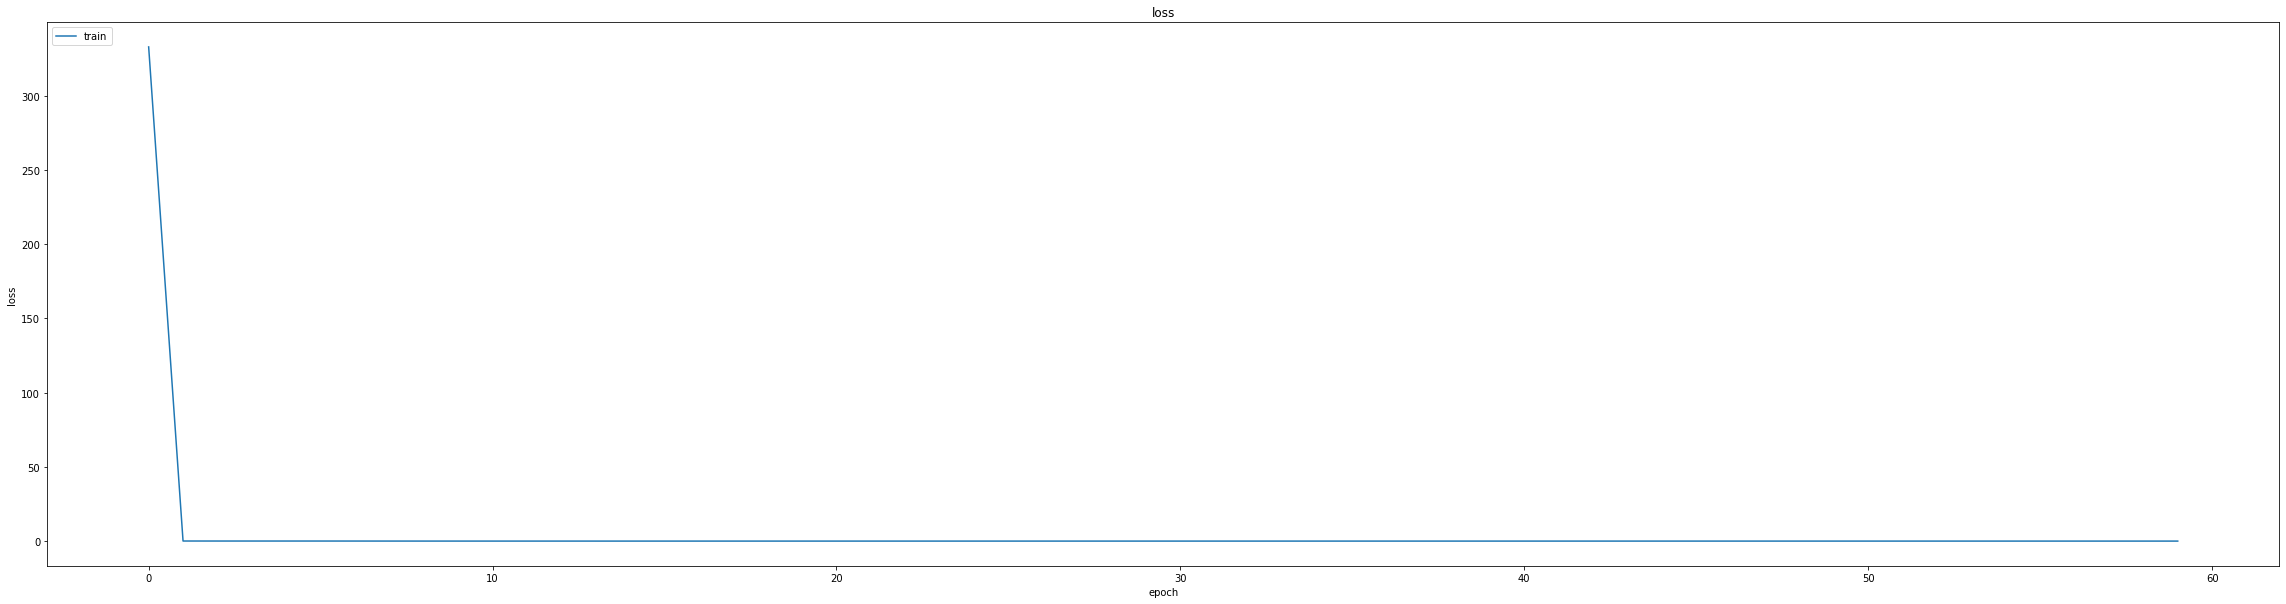

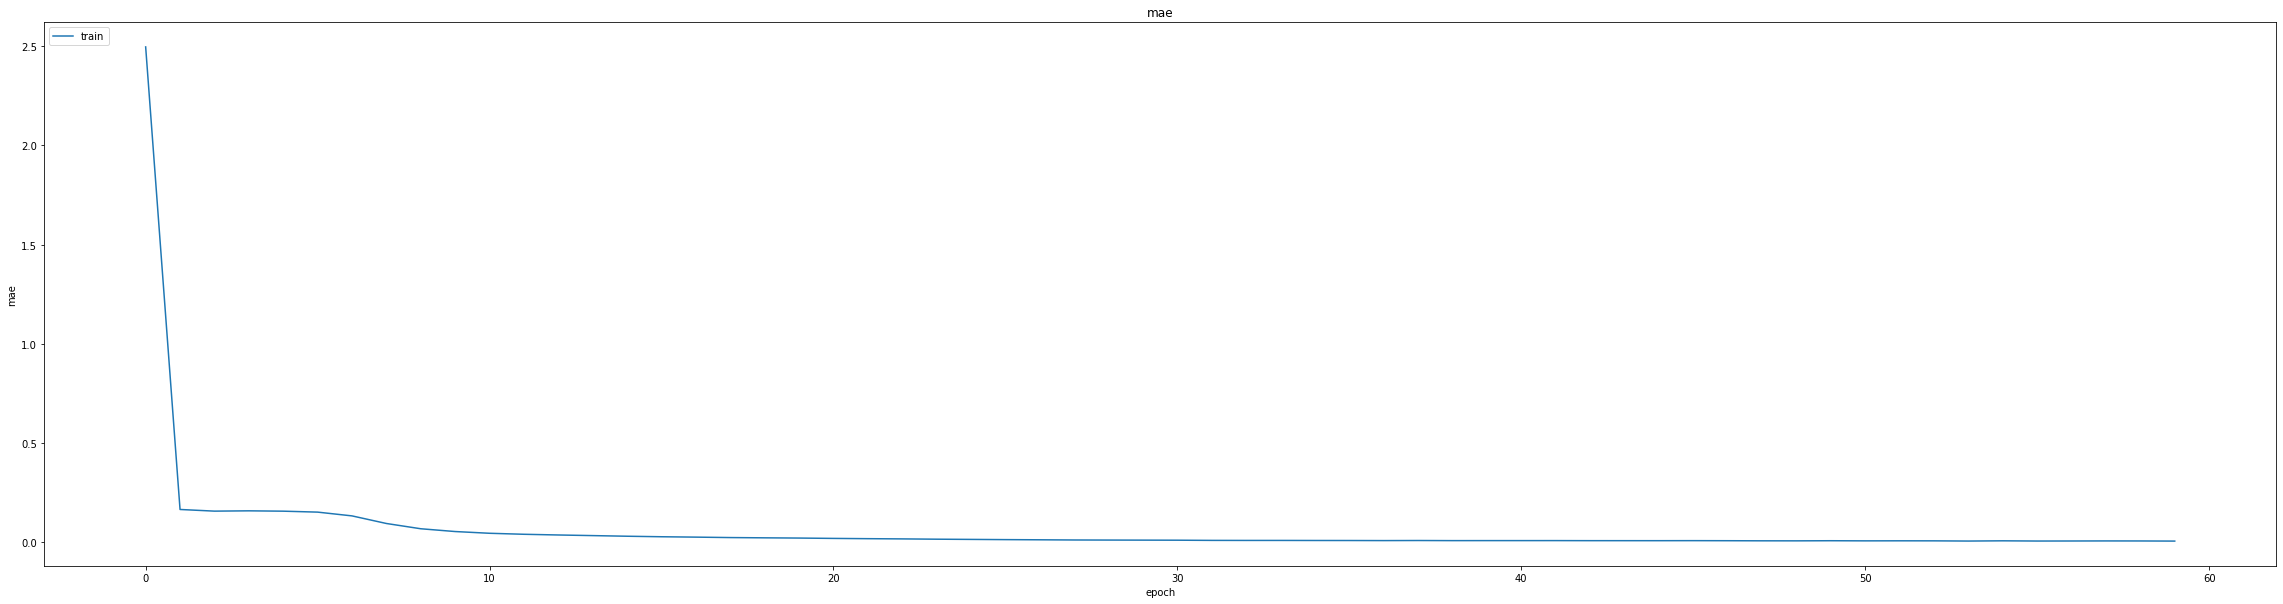

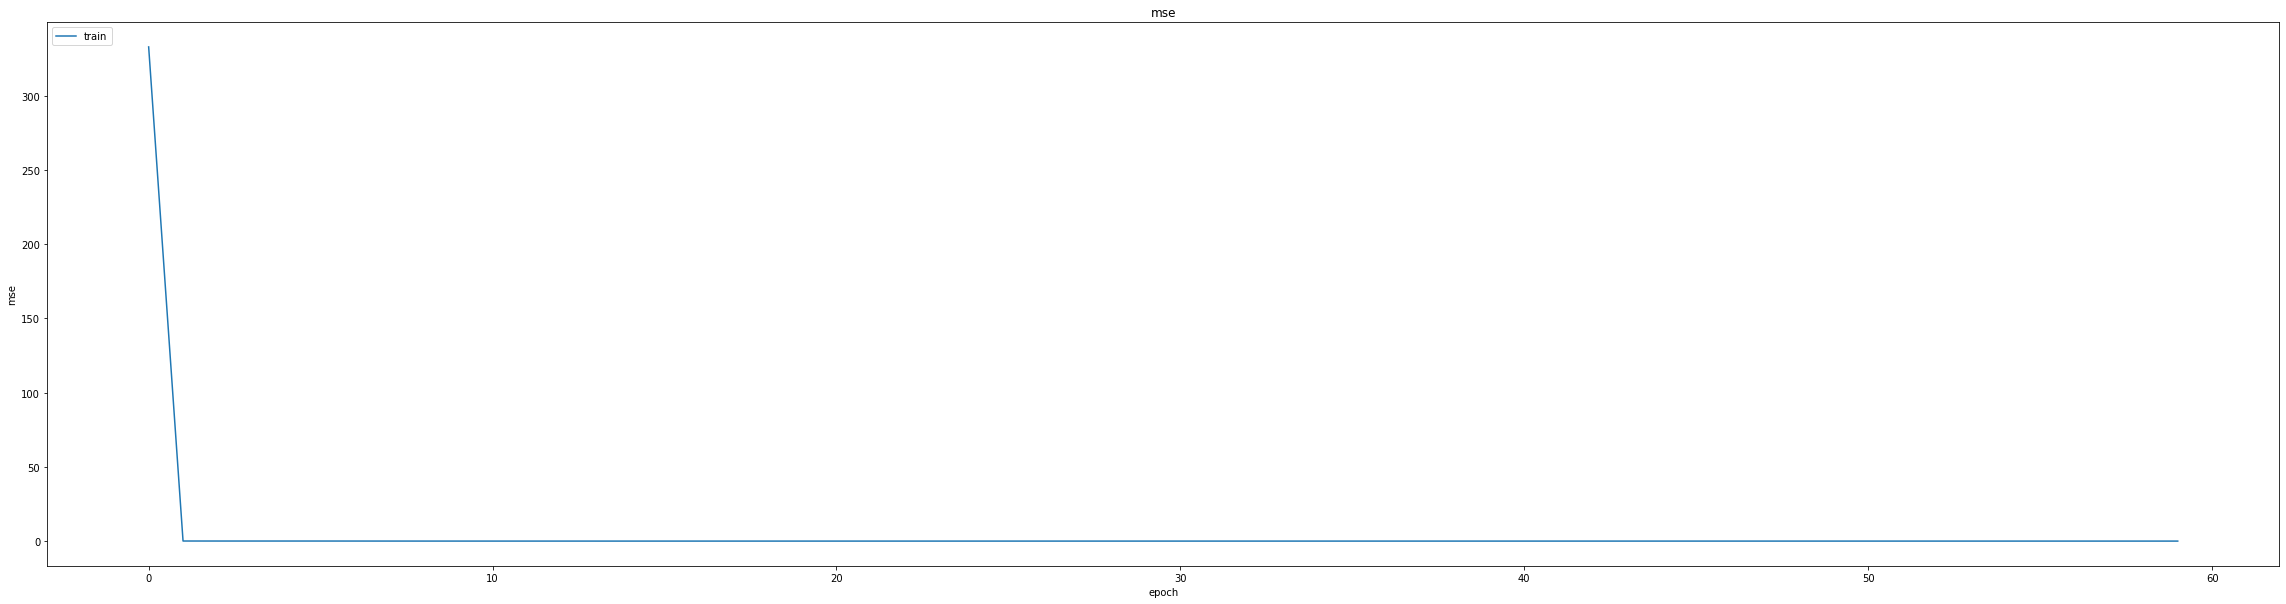

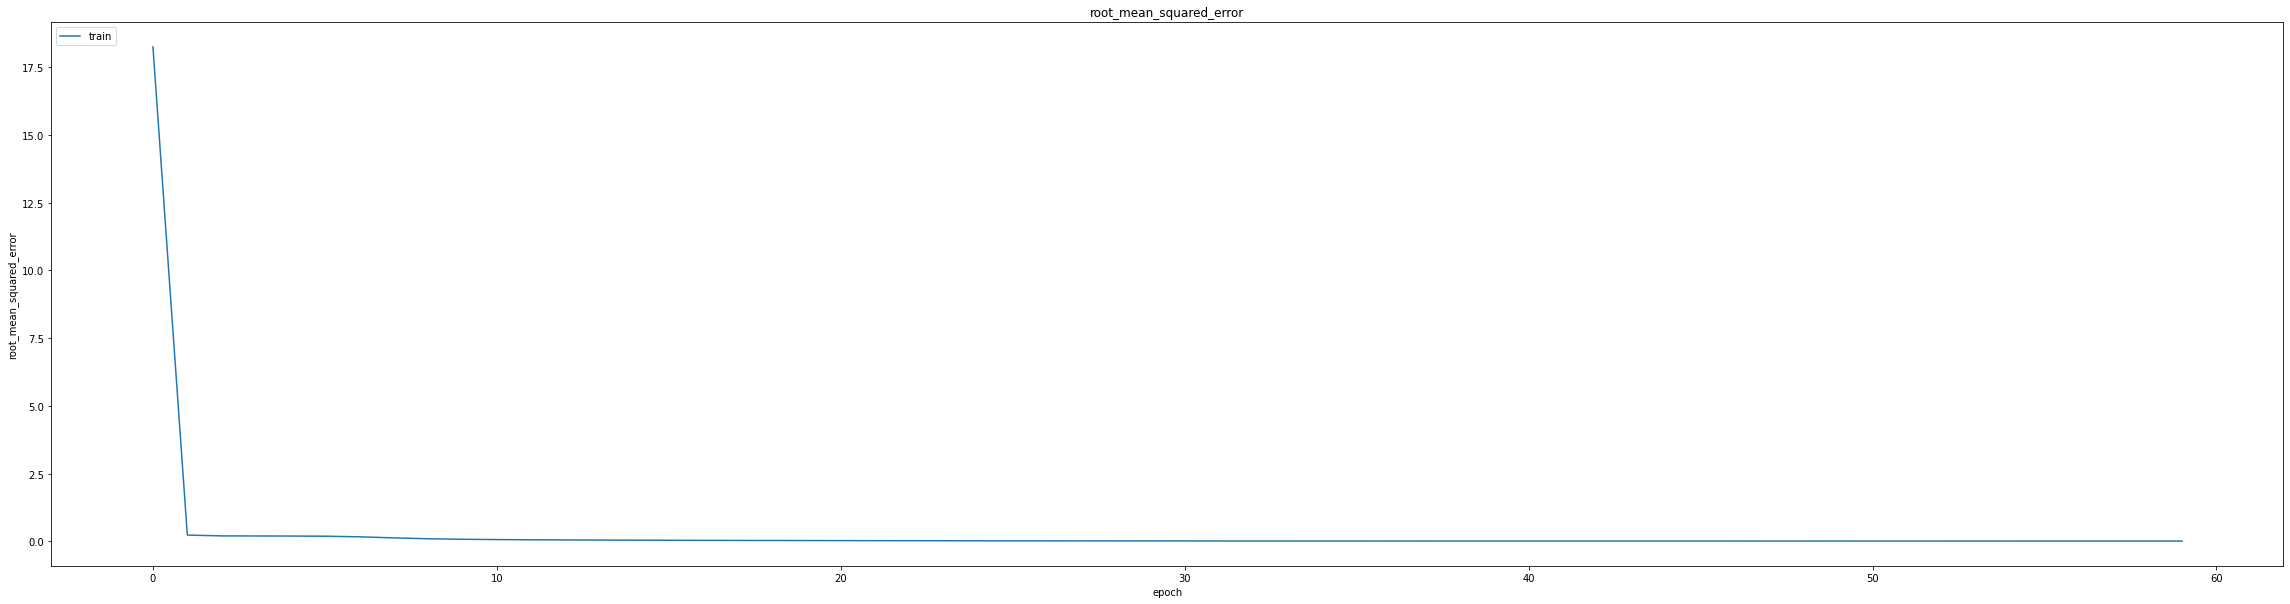

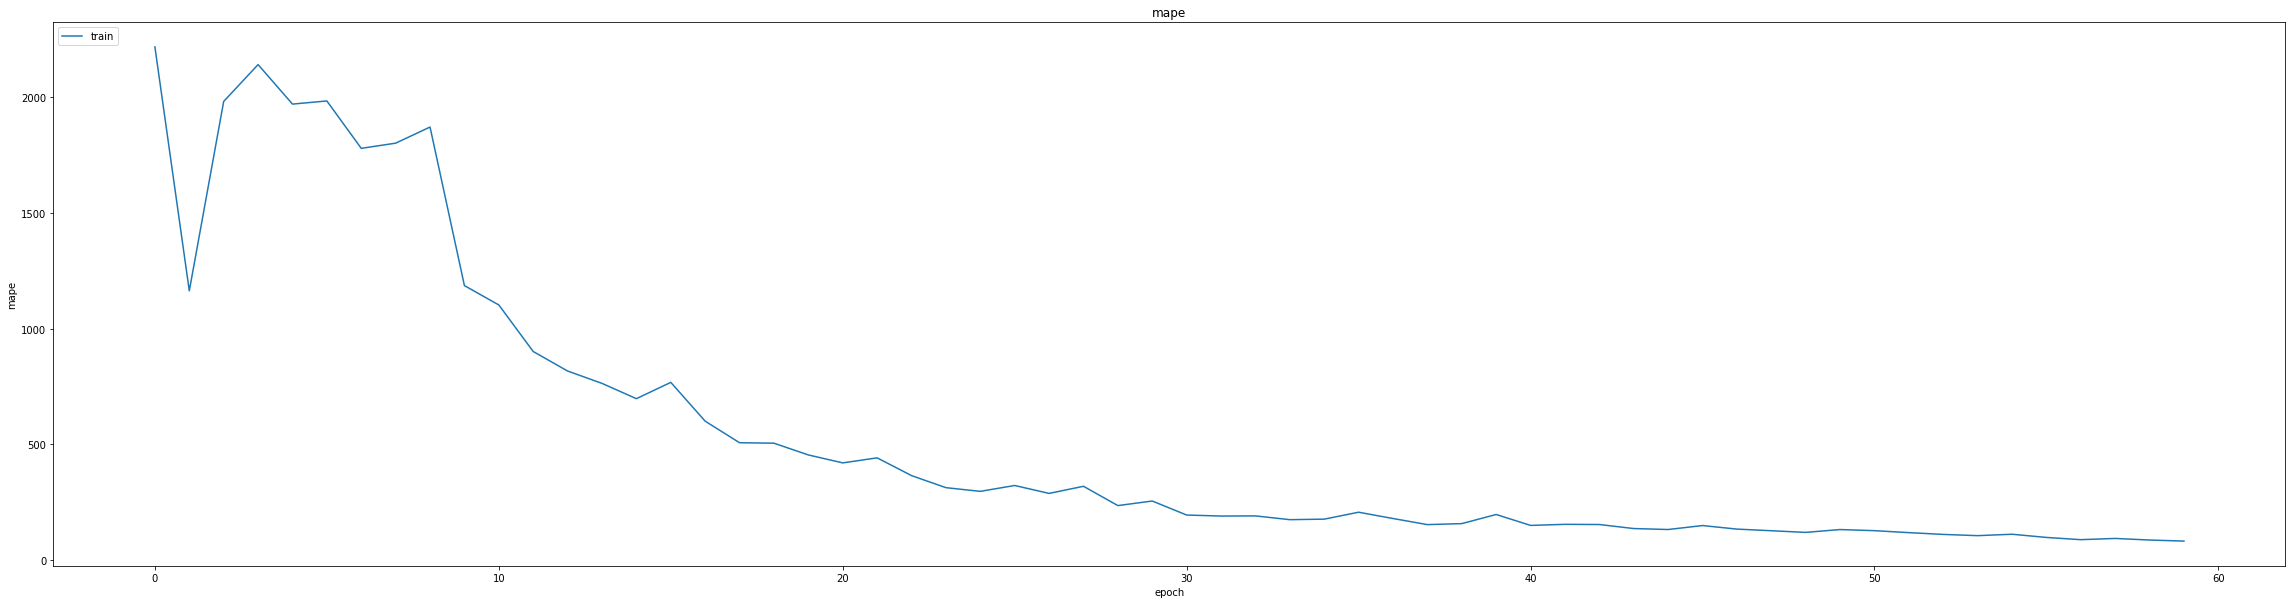

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014194140210747719
0.019812729209661484
687/687 [==============================] - 48s 65ms/step
0.9494764126124822


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD5_GRU_BiLSTM.hdf5")
early_stopping1 = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping1]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0132 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 334.4387
Epoch 1: val_mse did not improve from 0.00039
463/463 [==============================] - 349s 732ms/step - loss: 0.0013 - mae: 0.0132 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 334.4387 - val_loss: 6.8384e-04 - val_mae: 0.0195 - val_mse: 6.8384e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 1202.4811 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 5.2718e-05 - mae: 0.0054 - mse: 5.2718e-05 - root_mean_squared_error: 0.0073 - mape: 146.7050
Epoch 2: val_mse did not improve from 0.00039
463/463 [==============================] - 321s 693ms/step - loss: 5.2718e-05 - mae: 0.0054 - mse: 5.2718e-05 - root_mean_squared_error: 0.0073 - mape: 146.7050 - val_loss: 7.9619e-04 - val_mae: 0.0230 - val_mse: 7.9619e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 958.9514 - lr: 0.0010
lr 

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

687/687 [==============================] - 28s 36ms/step


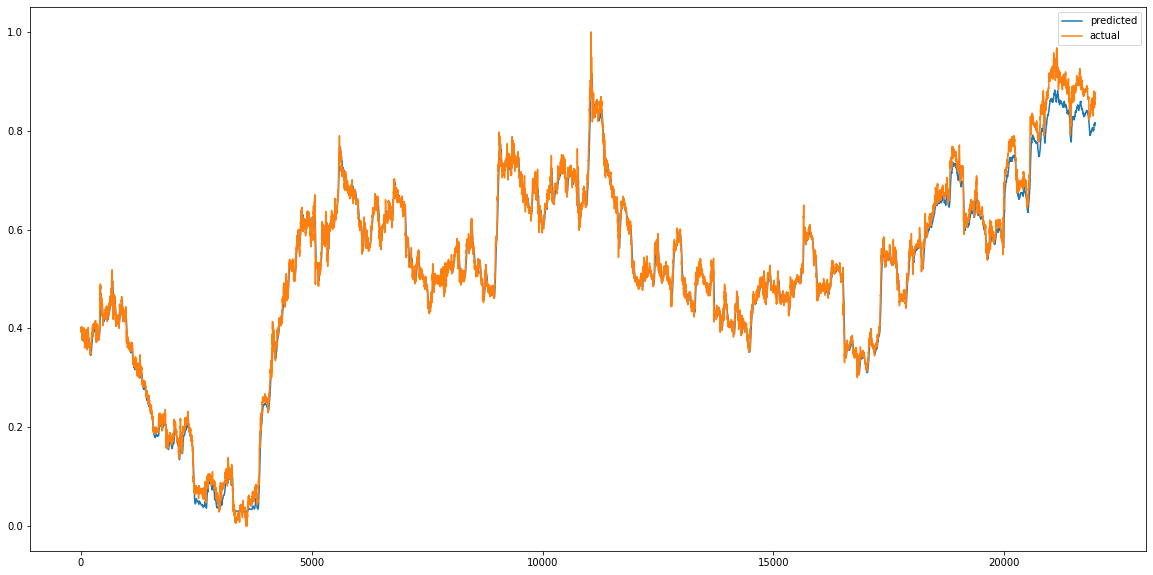

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD5_GRU_BiLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


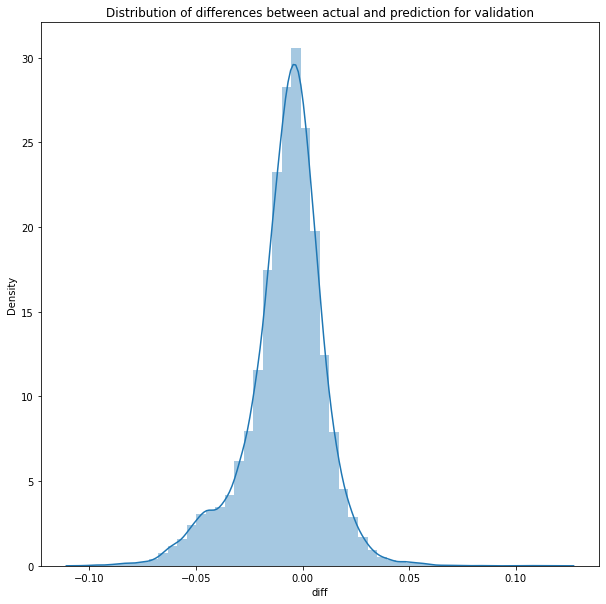

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 26s 37ms/step


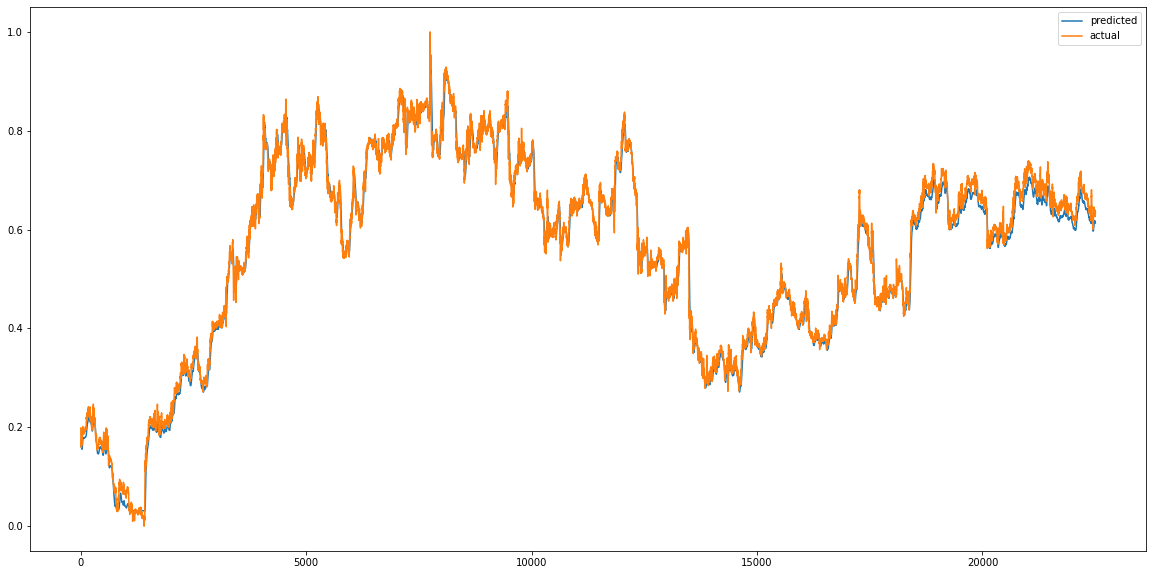

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


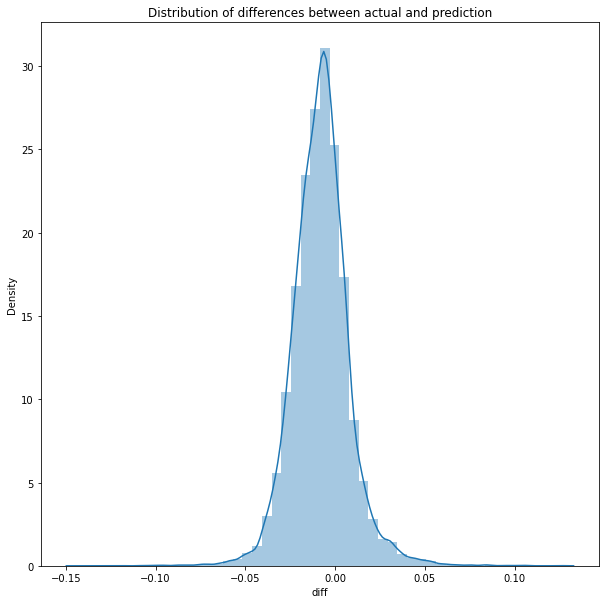

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0003176821945051799
MAE :  0.013598175822423845
RMSE  : 0.017823641449074876
704/704 [==============================] - 25s 36ms/step
R2_Score  : 0.9921399533866305


count    22505.000000
mean        -0.007982
std          0.015937
min         -0.143275
25%         -0.017413
50%         -0.007943
75%          0.000676
max          0.126388
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value

early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size= 385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 356.4198 - mae: 3.2875 - mse: 356.4198 - root_mean_squared_error: 18.8791 - mape: 5474.6045
Epoch 1: val_mse improved from inf to 0.04044, saving model to weights.best.hdf5
463/463 [==============================] - 328s 695ms/step - loss: 356.4198 - mae: 3.2875 - mse: 356.4198 - root_mean_squared_error: 18.8791 - mape: 5474.6045 - val_loss: 0.0404 - val_mae: 0.1541 - val_mse: 0.0404 - val_root_mean_squared_error: 0.2011 - val_mape: 22633.7598
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0441 - mae: 0.1789 - mse: 0.0441 - root_mean_squared_error: 0.2100 - mape: 2596.7966
Epoch 2: val_mse did not improve from 0.04044
463/463 [==============================] - 329s 710ms/step - loss: 0.0441 - mae: 0.1789 - mse: 0.0441 - root_mean_squared_error: 0.2100 - mape: 2596.7966 - val_loss: 0.0641 - val_mae: 0.2167 - val_mse: 0.0641 - val_root_mean_squared_error: 0.2532 - val_mape: 16781.5156
Epoch 3/6

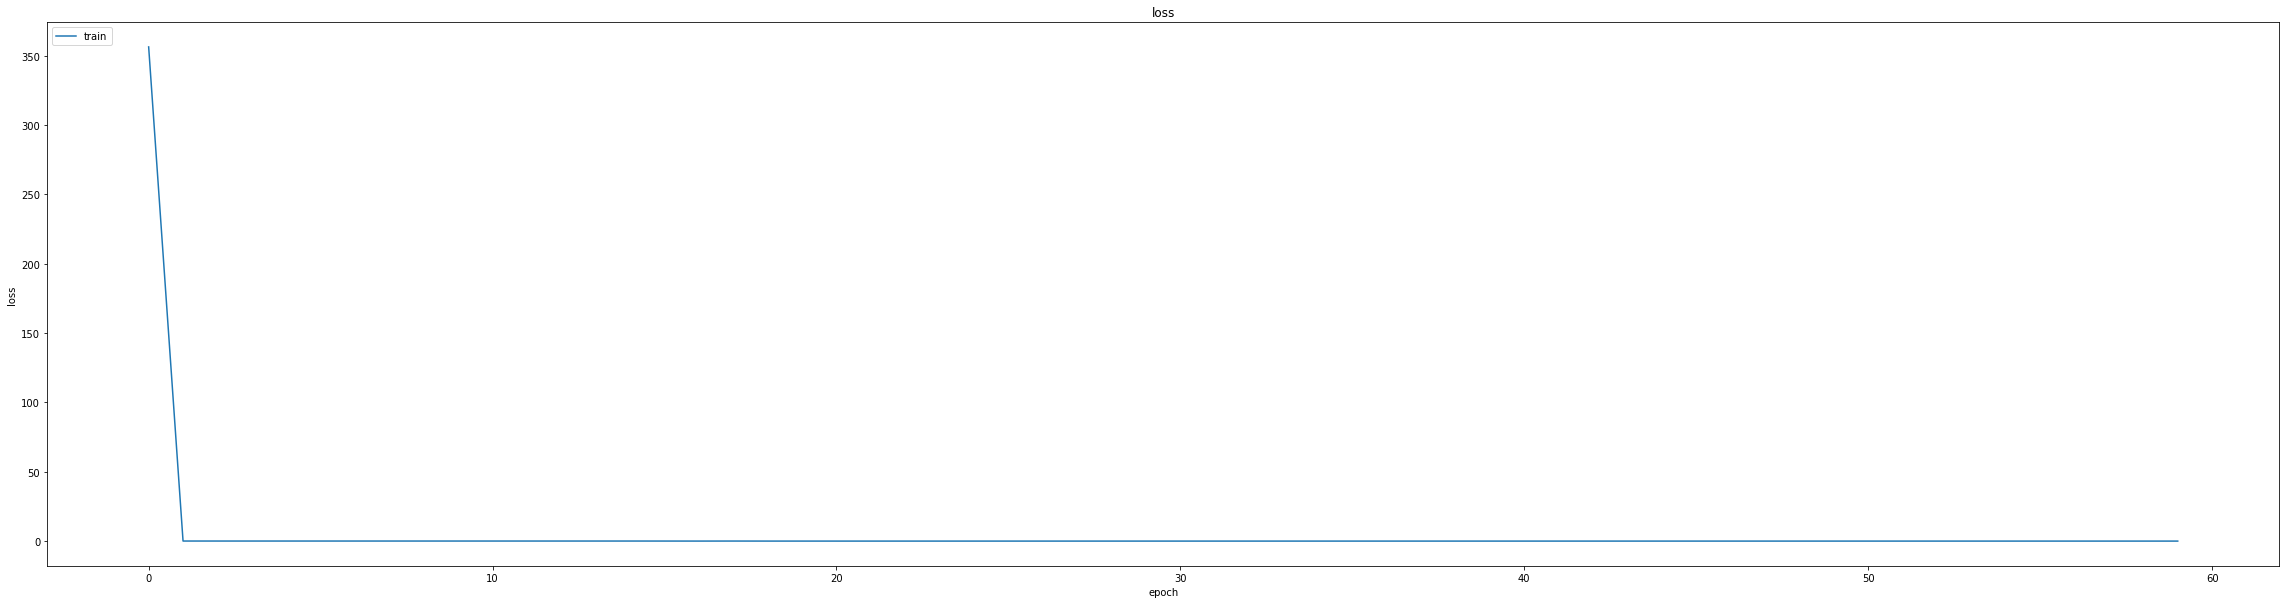

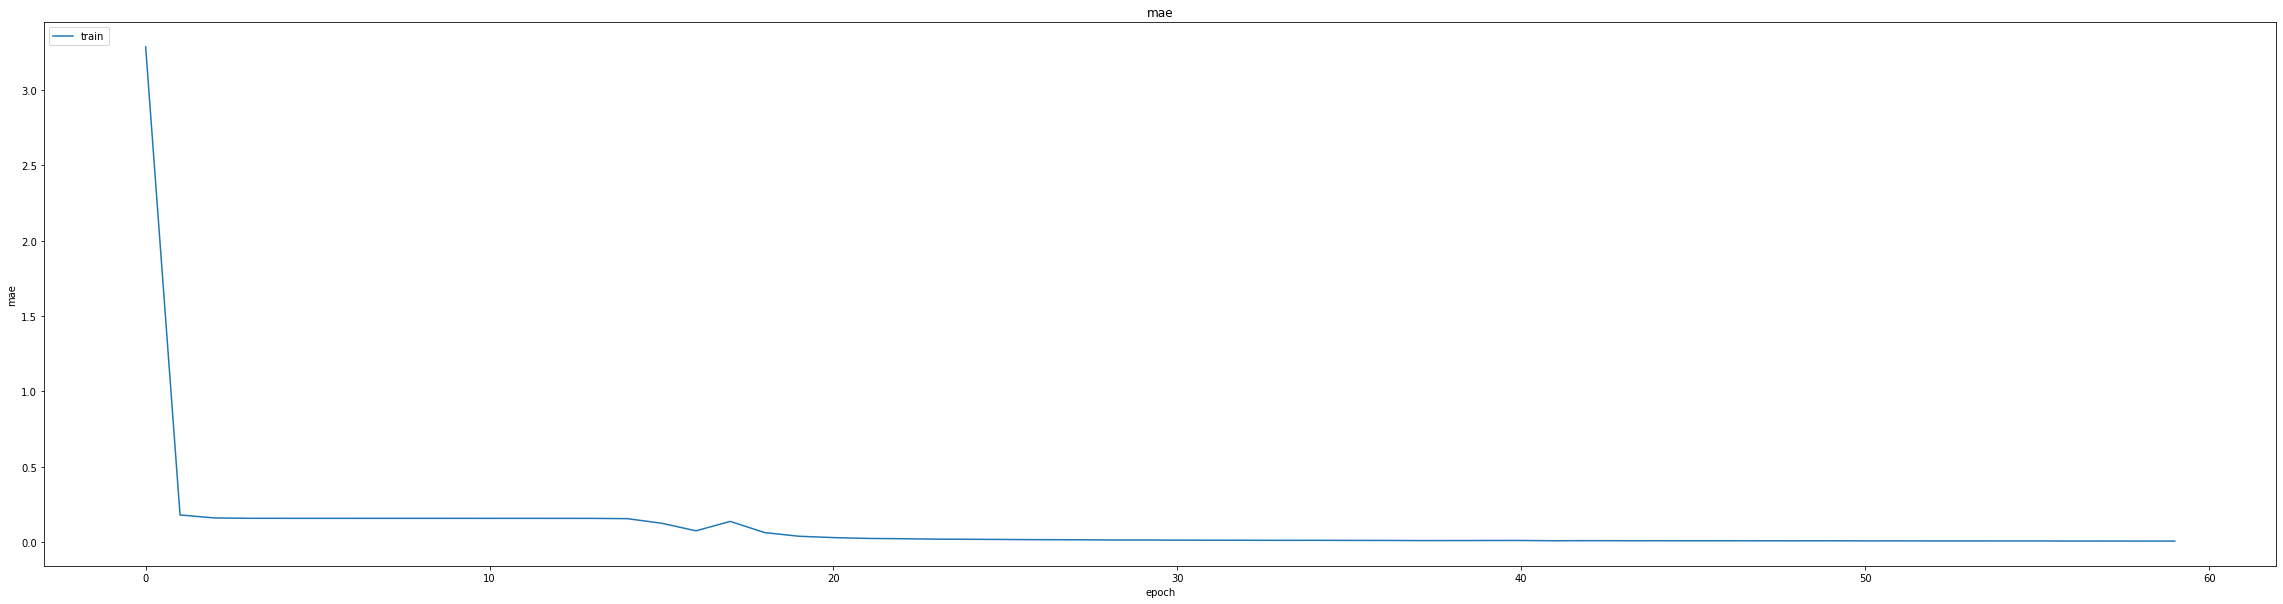

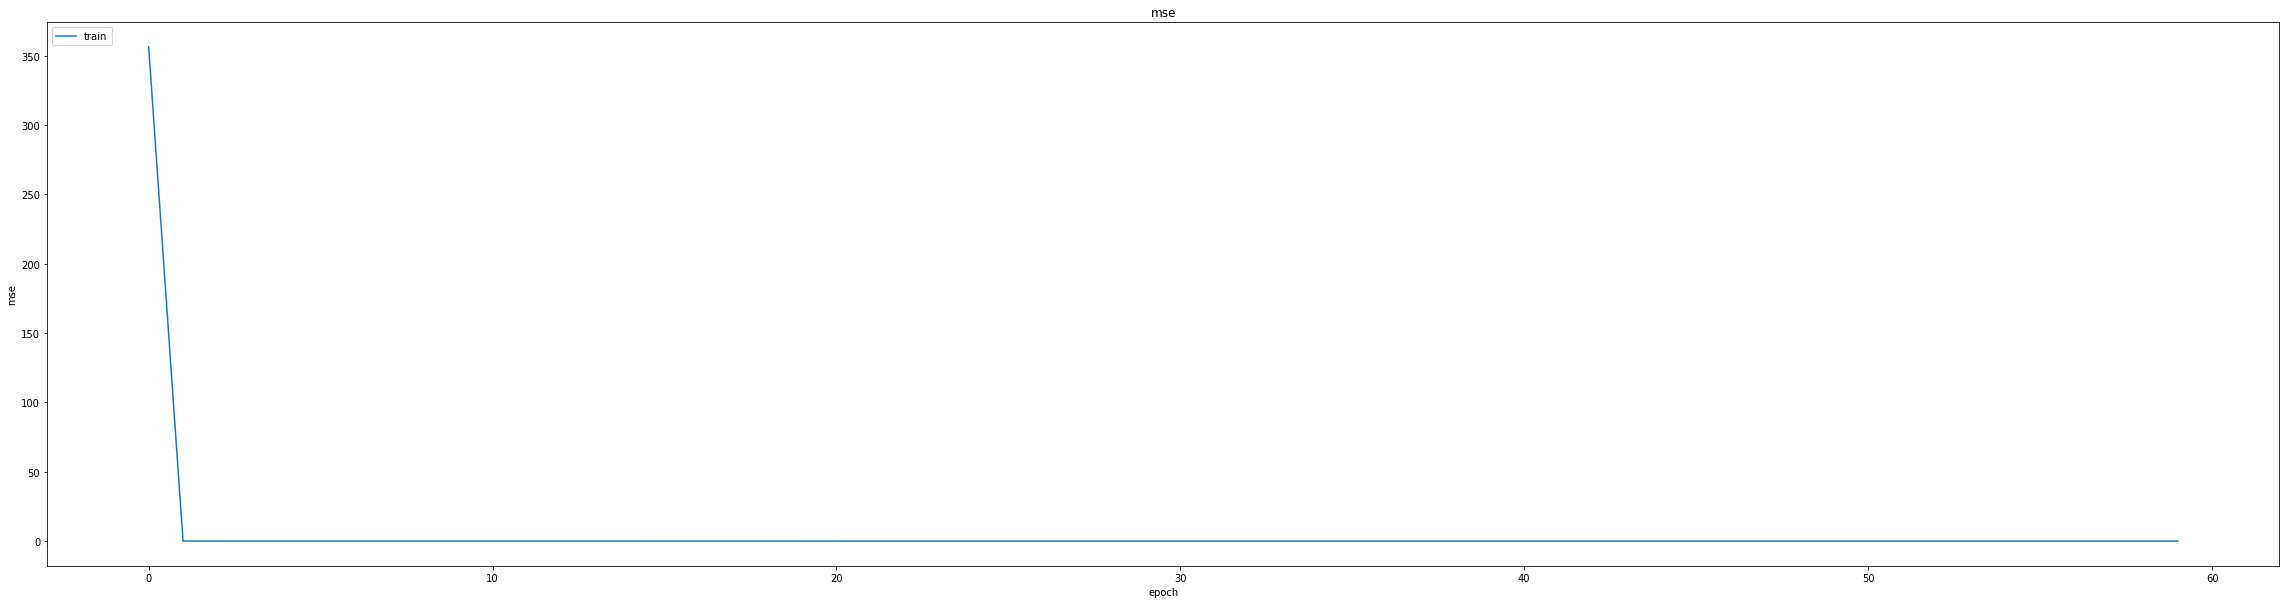

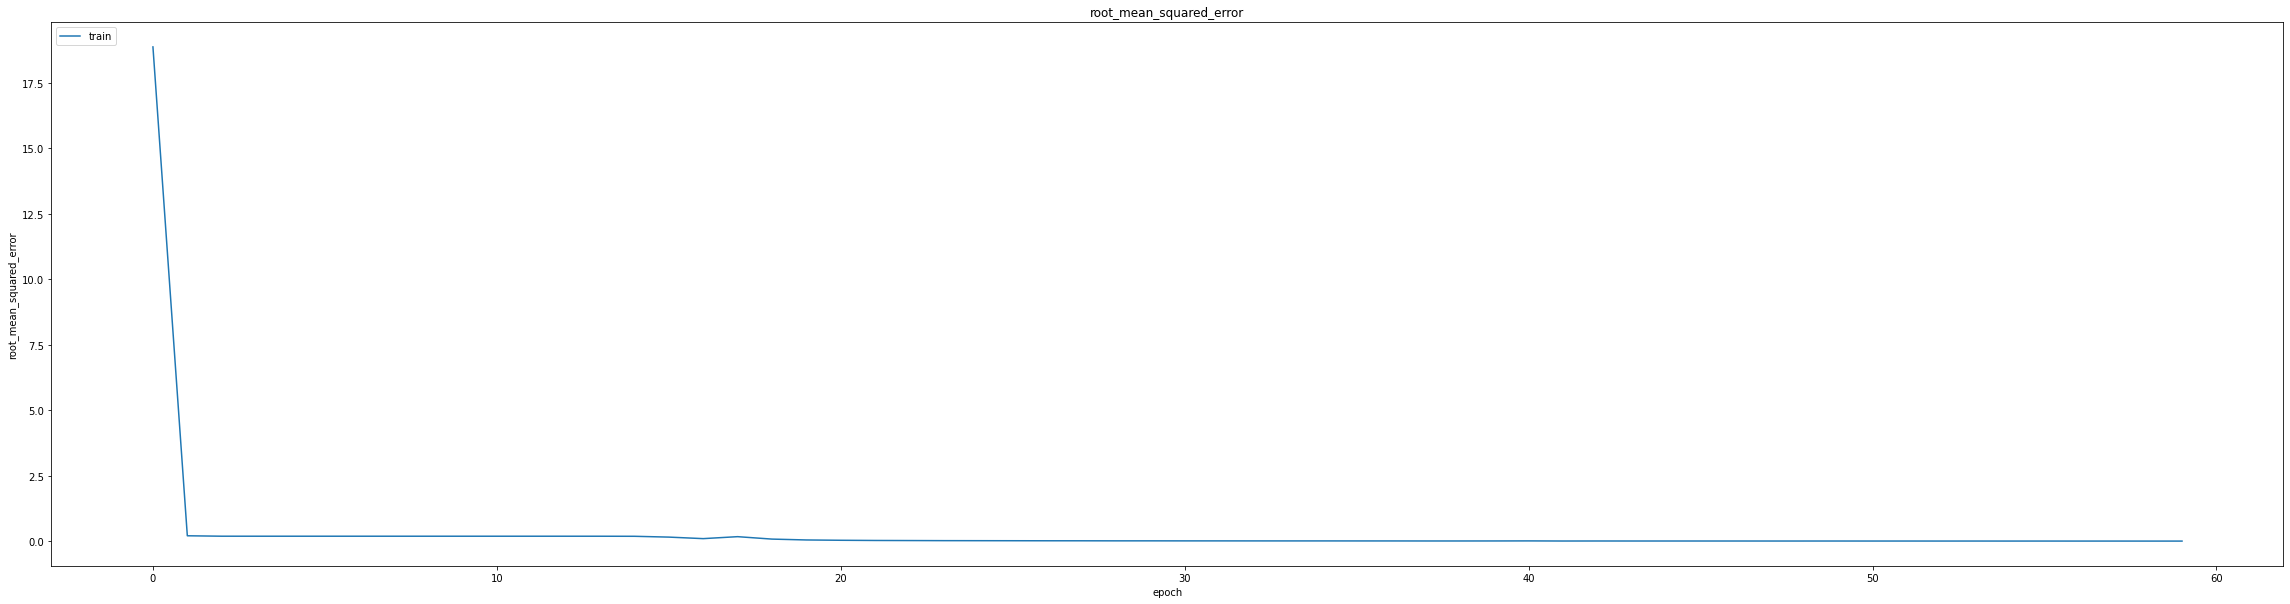

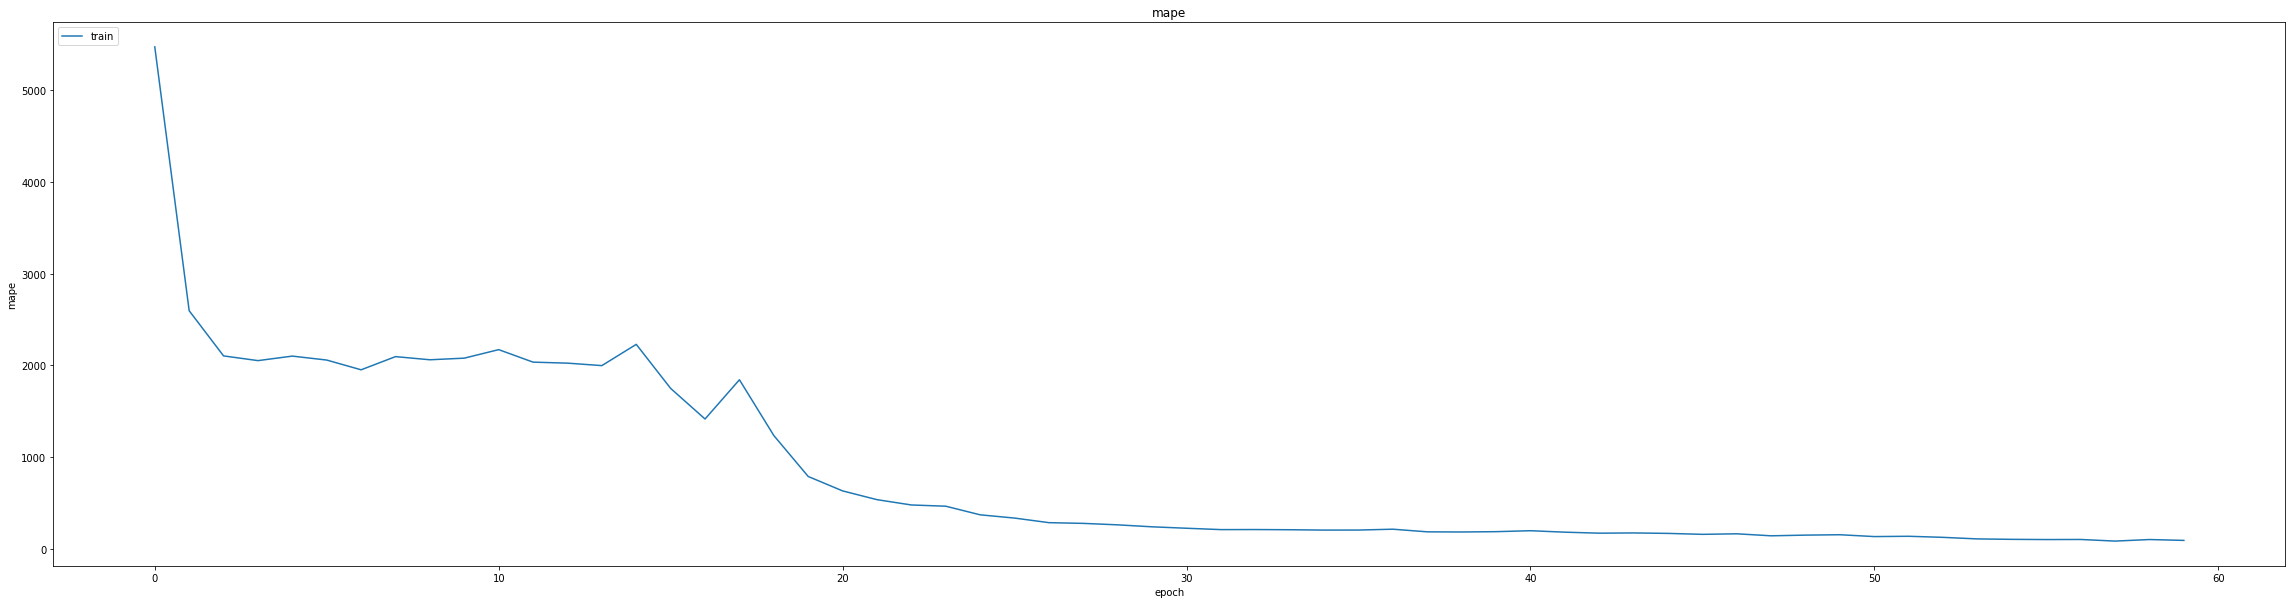

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.017522895708680153
0.023658229038119316
687/687 [==============================] - 31s 42ms/step
0.9822910602924282


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 4.9699e-04 - mae: 0.0097 - mse: 4.9699e-04 - root_mean_squared_error: 0.0223 - mape: 200.7272
Epoch 1: val_mse did not improve from 0.00056
463/463 [==============================] - 337s 715ms/step - loss: 4.9699e-04 - mae: 0.0097 - mse: 4.9699e-04 - root_mean_squared_error: 0.0223 - mape: 200.7272 - val_loss: 0.0010 - val_mae: 0.0256 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 1336.2402 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 5.0356e-05 - mae: 0.0053 - mse: 5.0356e-05 - root_mean_squared_error: 0.0071 - mape: 168.9891
Epoch 2: val_mse did not improve from 0.00056
463/463 [==============================] - 332s 717ms/step - loss: 5.0356e-05 - mae: 0.0053 - mse: 5.0356e-05 - root_mean_squared_error: 0.0071 - mape: 168.9891 - val_loss: 0.0012 - val_mae: 0.0286 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 1148.8431 - lr: 0.0010
lr

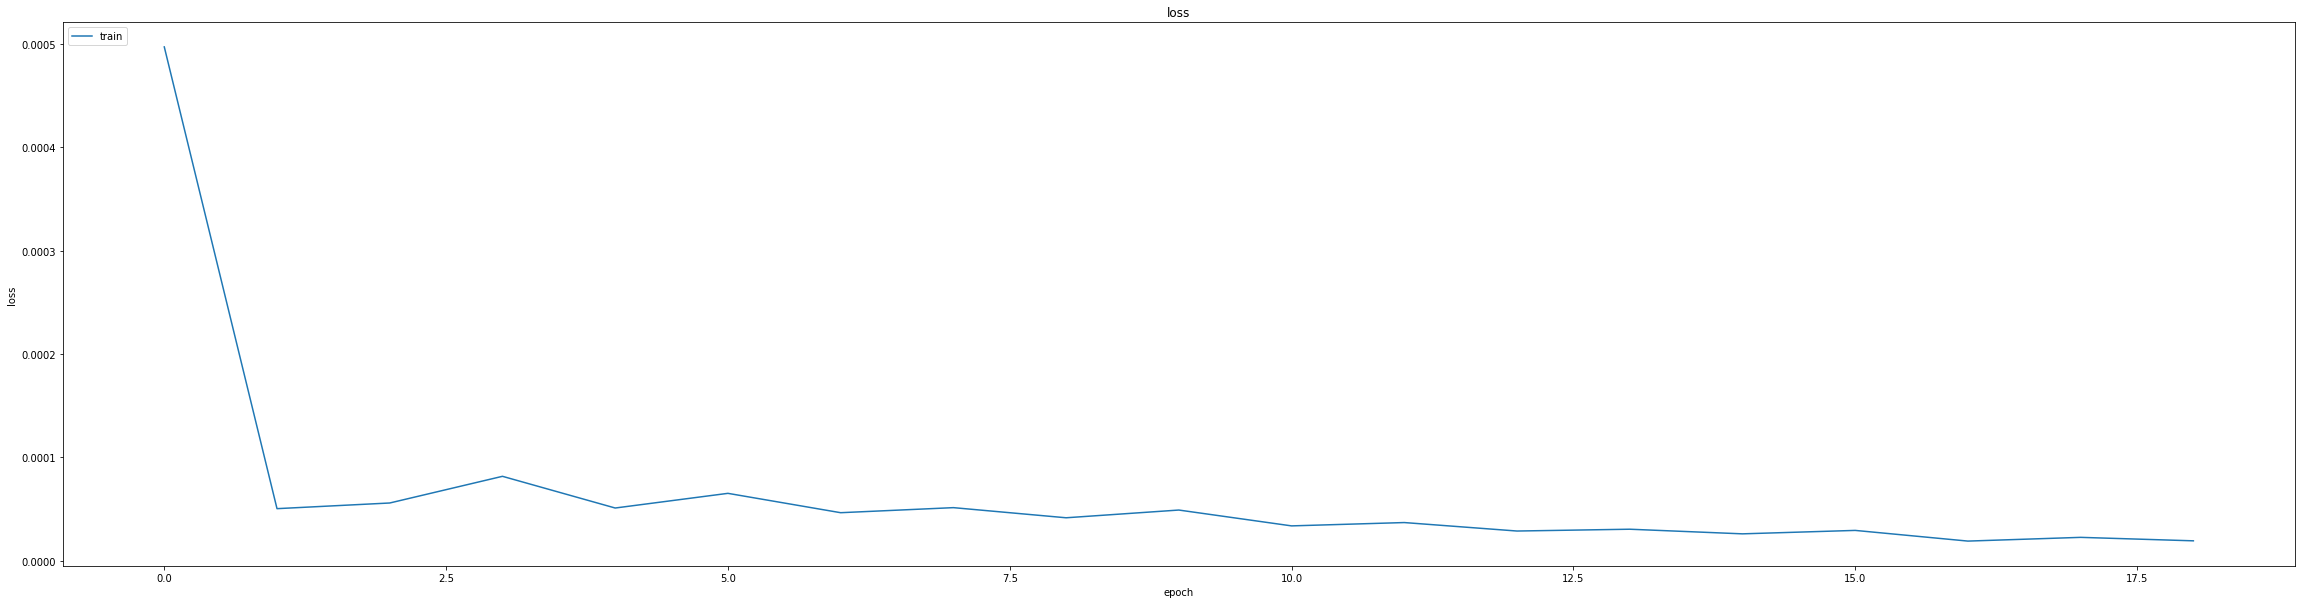

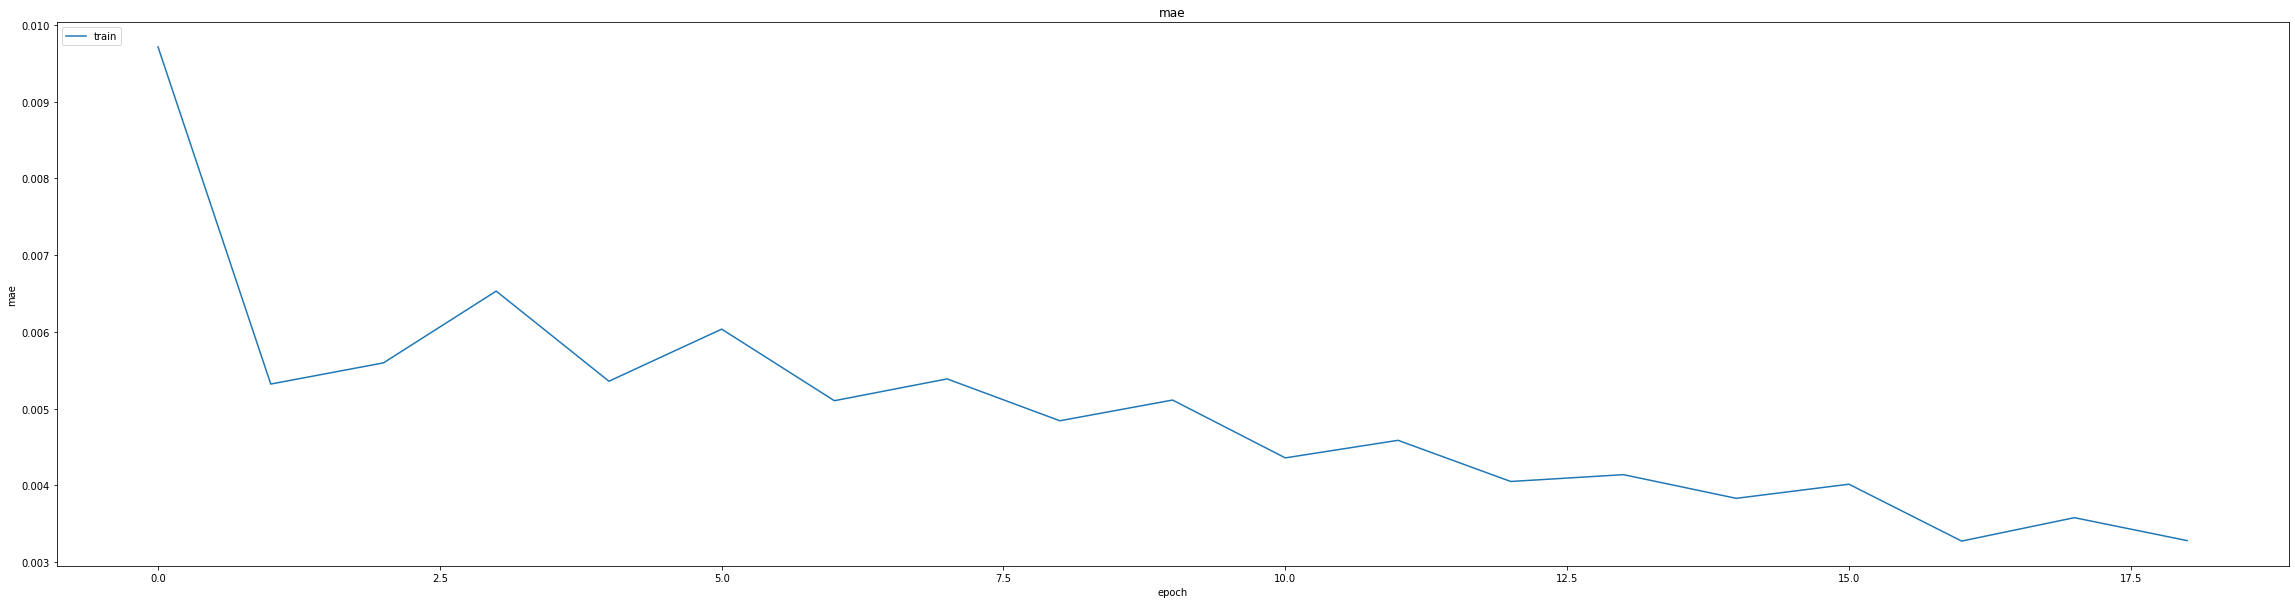

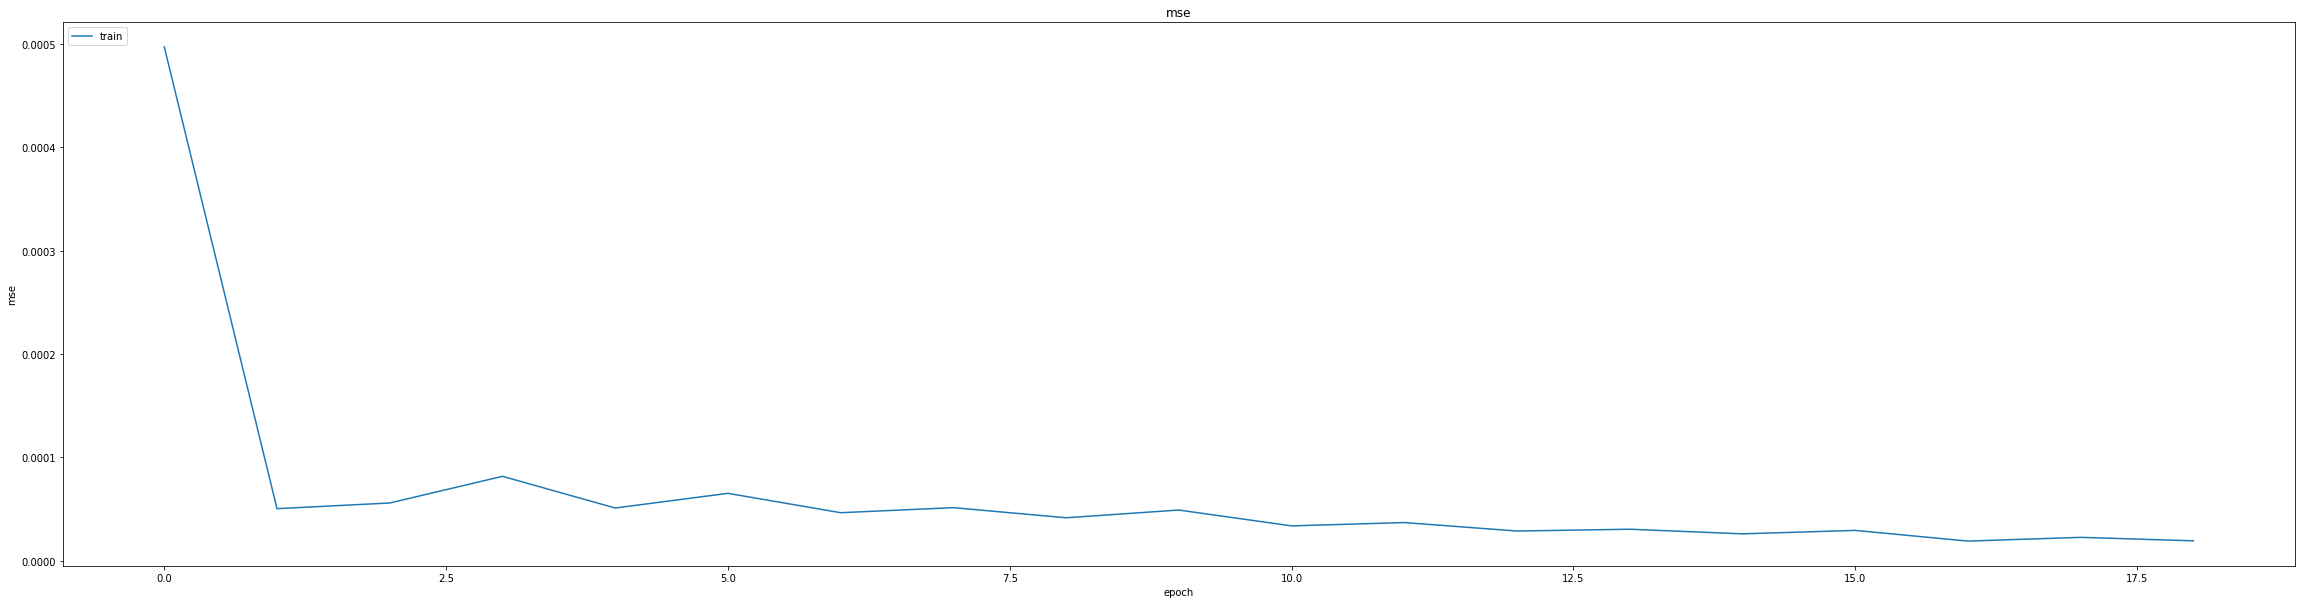

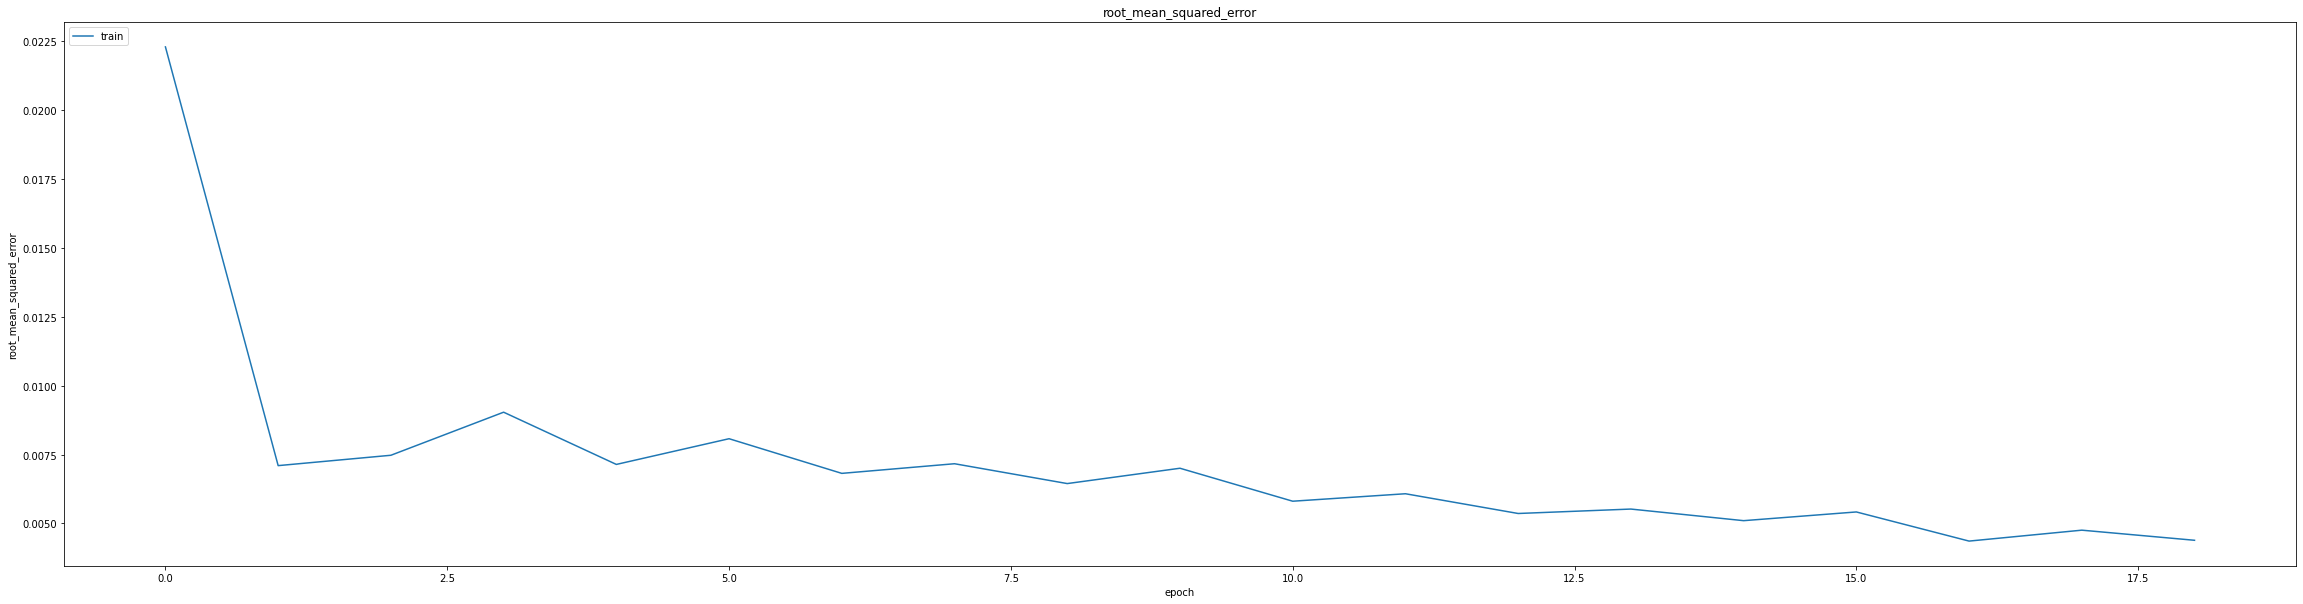

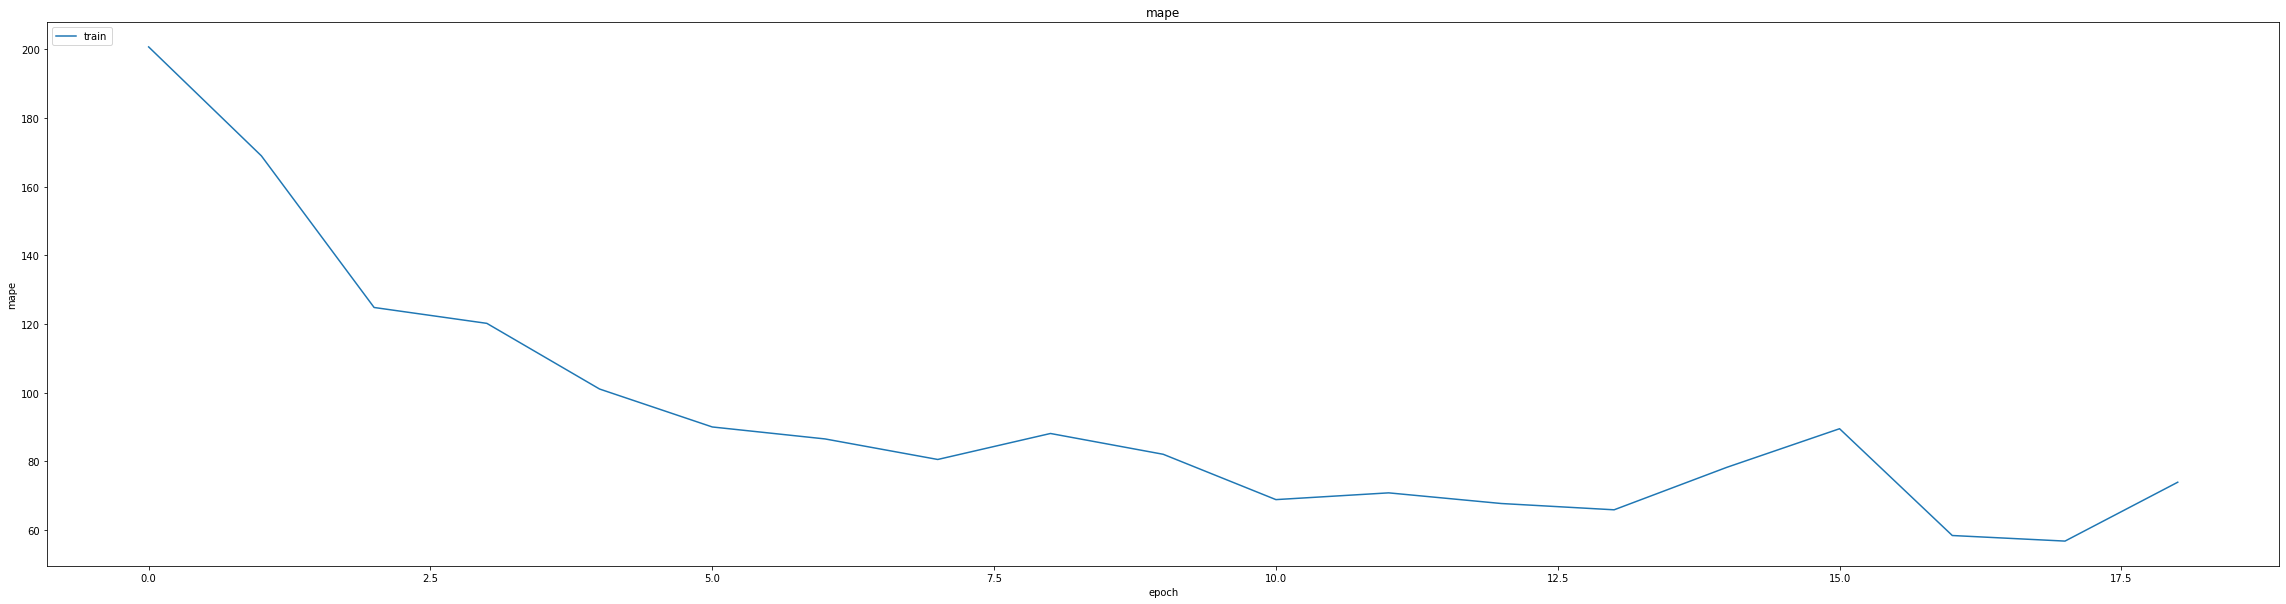

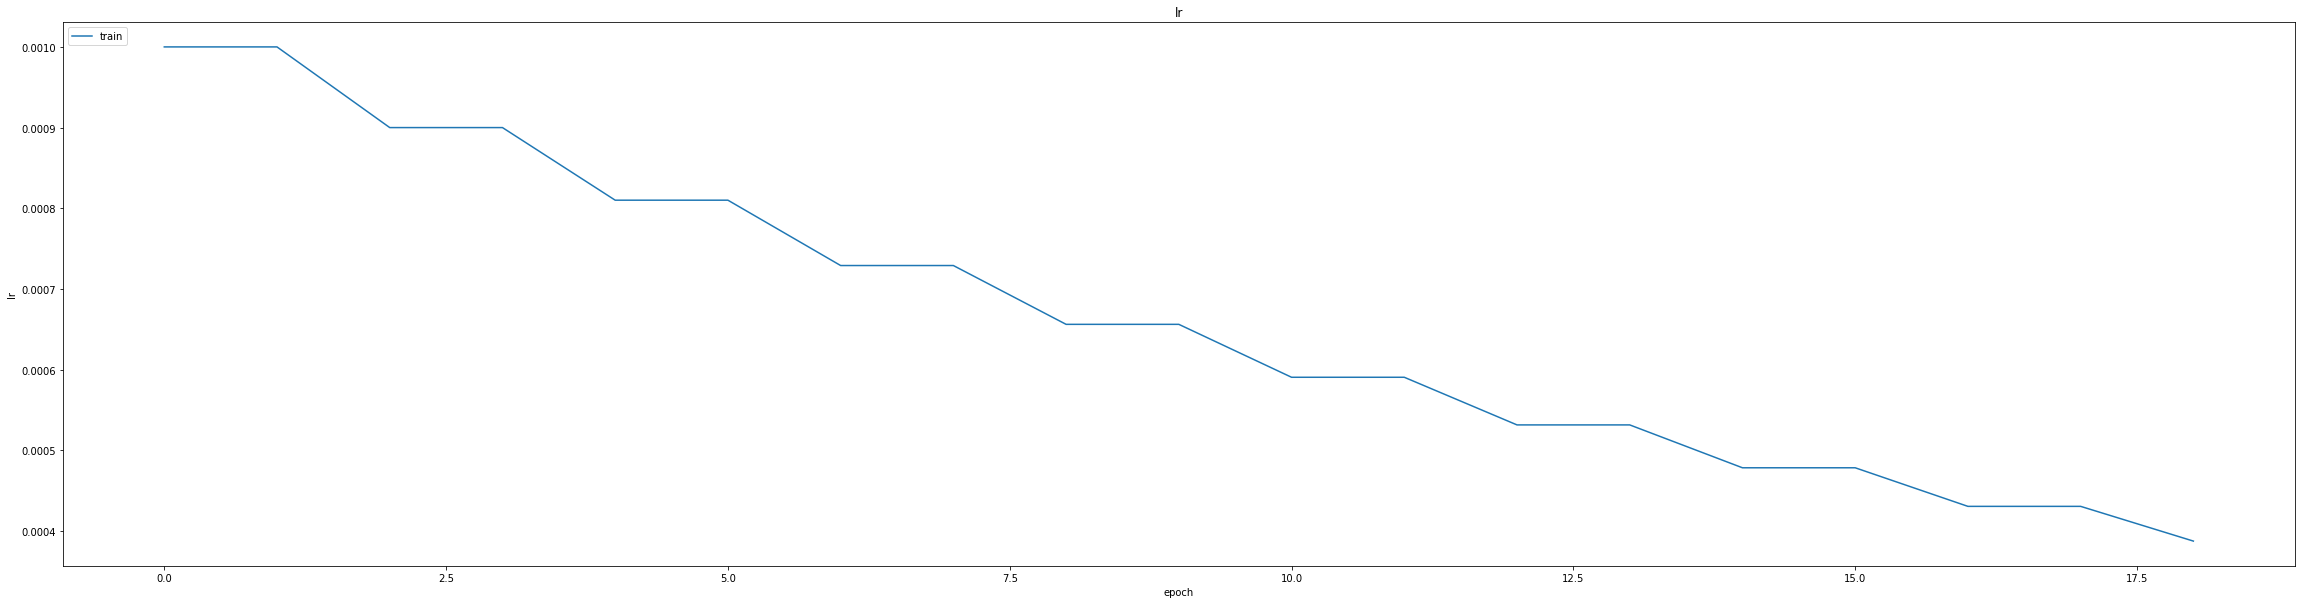

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.021668724715709686
0.02702840231359005
687/687 [==============================] - 28s 39ms/step
-303.8606140193719


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 26s 38ms/step


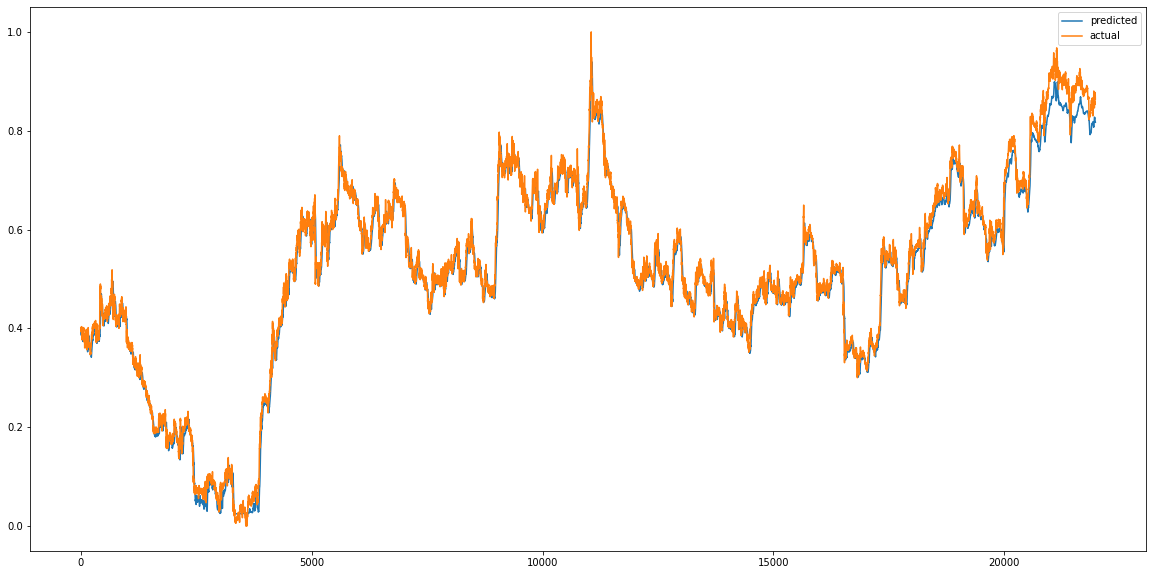

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


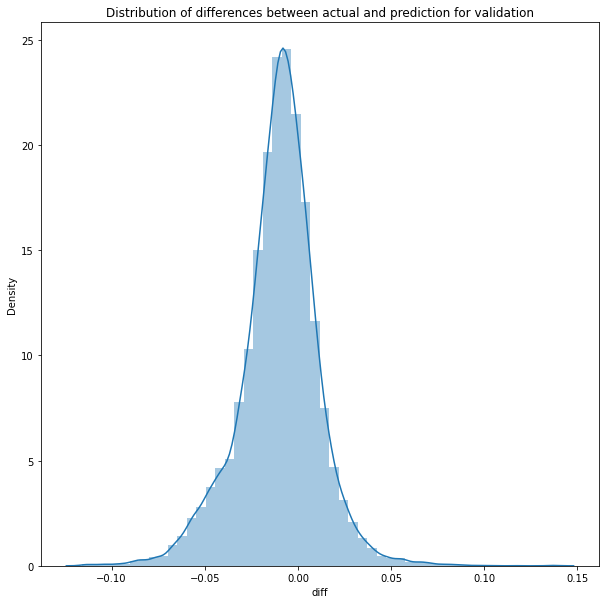

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 27s 38ms/step


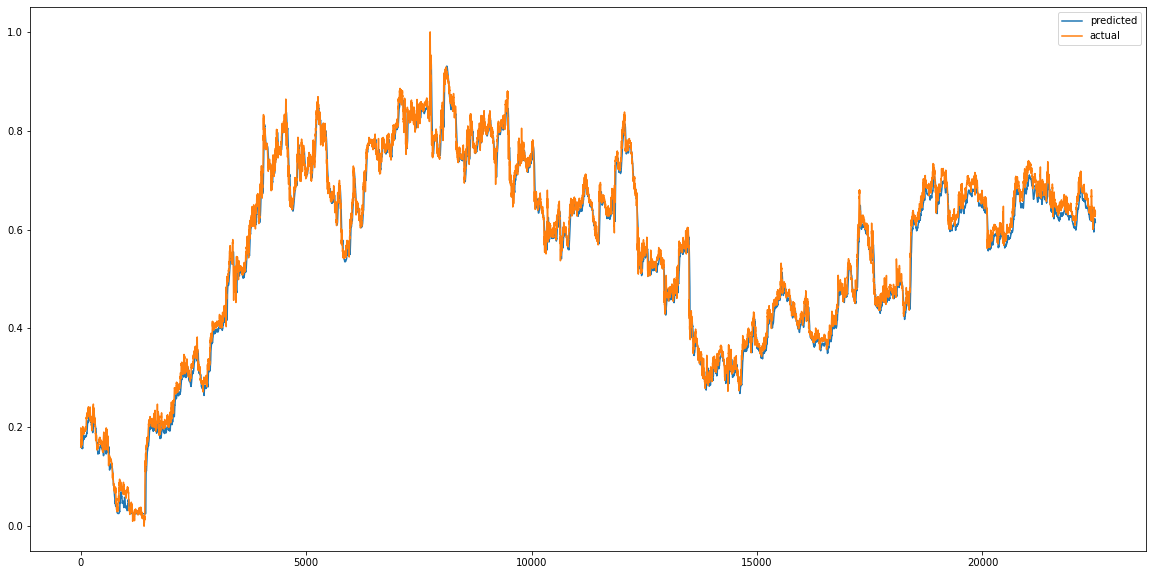

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


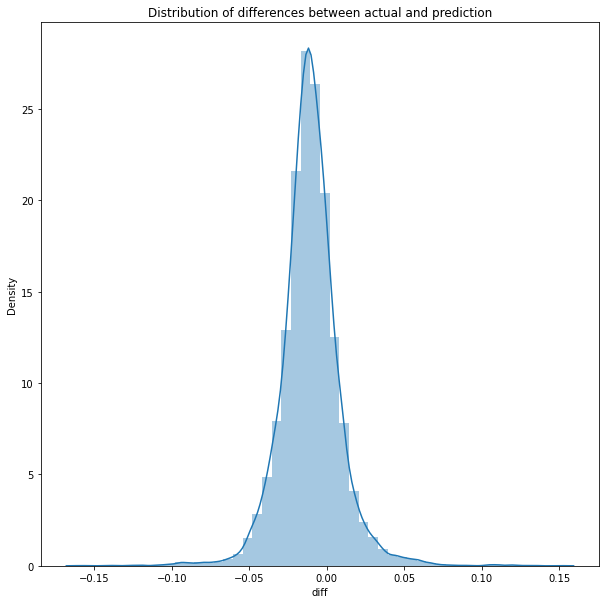

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00048597338867543174
MAE :  0.0167339276951125
RMSE :  0.022044804119688424
704/704 [==============================] - 28s 39ms/step
R2_Score  : -303.8606140193719


count    22505.000000
mean        -0.010742
std          0.019251
min         -0.160361
25%         -0.020611
50%         -0.011110
75%         -0.001173
max          0.151464
Name: diff, dtype: float64